In [1]:
import numpy as np
import pandas as pd



In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:

train_data=pd.read_csv("/train.csv")
test_data=pd.read_csv("/test.csv")
sample_submission_data=pd.read_csv("/sample_submission.csv")


In [5]:
print("train_data shape :",train_data.shape)
print("test_data shape:",test_data.shape)
print("sample_submission_data shape:",sample_submission_data.shape)

train_data shape : (8693, 14)
test_data shape: (4277, 13)
sample_submission_data shape: (4277, 2)


In [6]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
#train data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
#check the null values
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [10]:
train_data.drop_duplicates(inplace=True)
train_data.shape

(8693, 14)

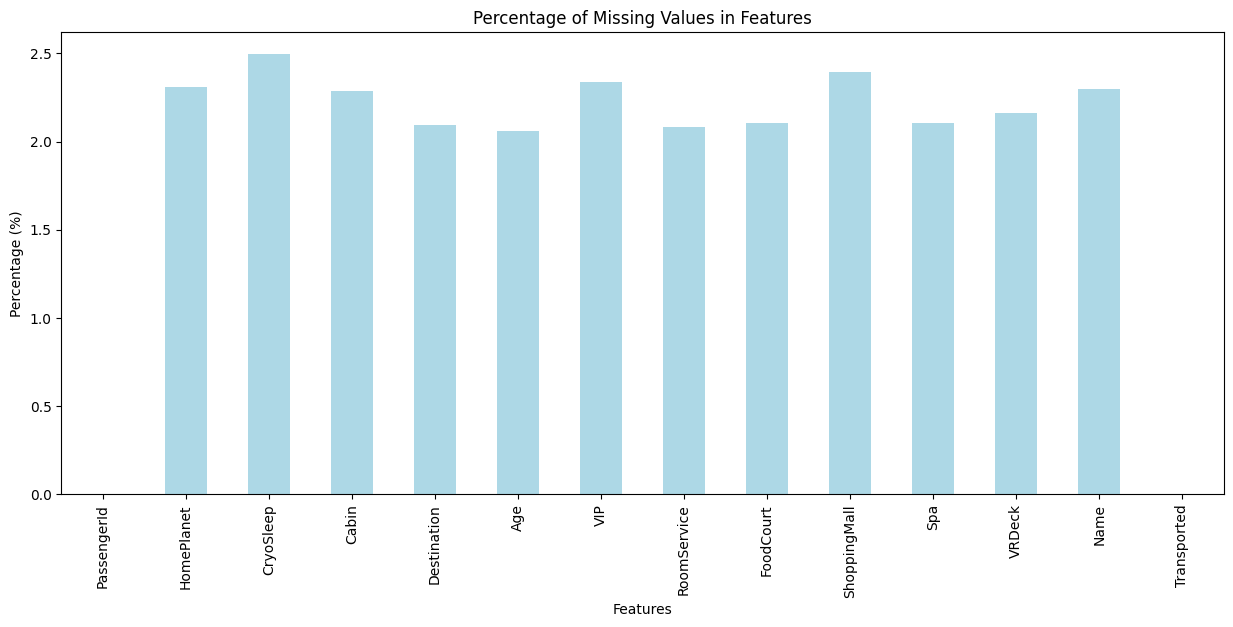

In [11]:
# Calculate the percentage of missing values in each feature:
missing_percentage = train_data.isnull().mean() * 100

#create a bar plot
plt.figure(figsize=(15,6))
missing_percentage.plot(kind='bar', color='lightblue')
plt.title('Percentage of Missing Values in Features')
plt.xlabel('Features')
plt.ylabel('Percentage (%)')
plt.show()

In [12]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


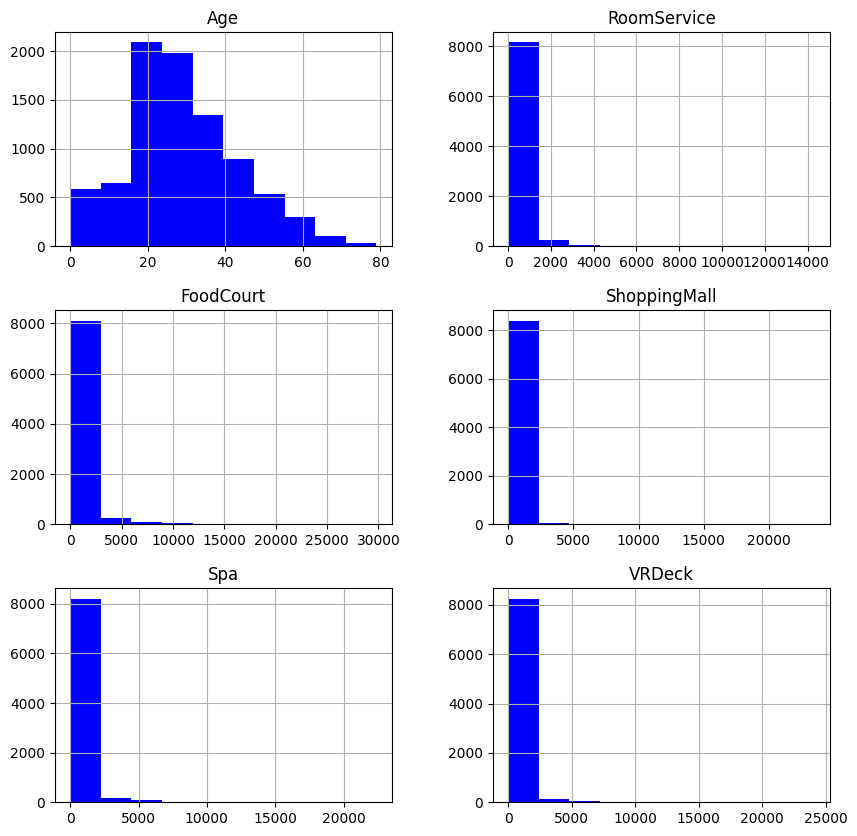

In [13]:
train_data.hist(figsize=(10,10),color = 'blue')
plt.show()

countplot


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


<Axes: xlabel='HomePlanet', ylabel='count'>

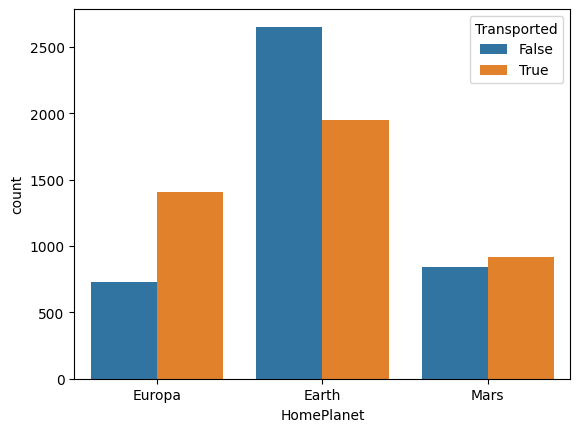

In [14]:
# Visualizing passenger home planet and transported or not:
print(train_data['HomePlanet'].value_counts())
sns.countplot(x='HomePlanet',hue='Transported', data=train_data)

False    5439
True     3037
Name: CryoSleep, dtype: int64


<Axes: xlabel='CryoSleep', ylabel='count'>

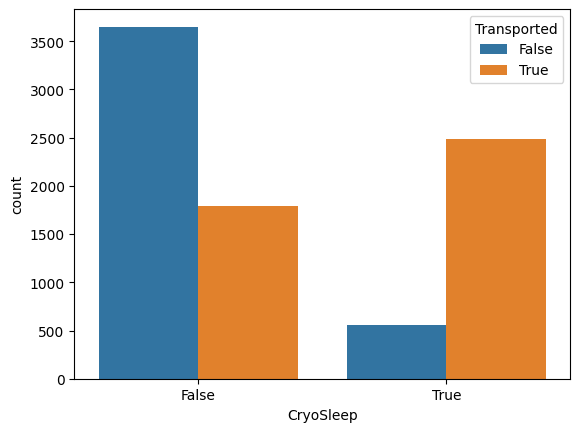

In [15]:
print(train_data['CryoSleep'].value_counts())
sns.countplot(x='CryoSleep',hue='Transported', data=train_data)


TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


<Axes: xlabel='Destination', ylabel='count'>

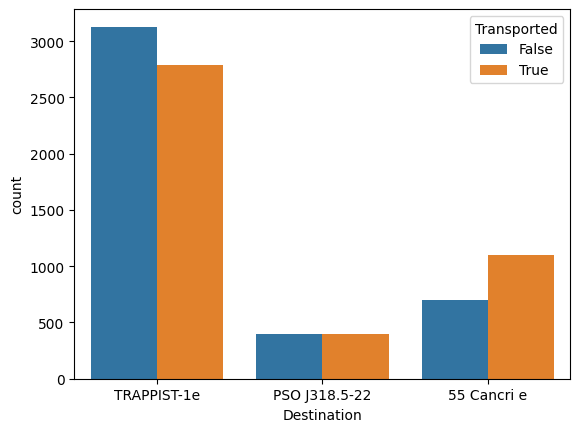

In [16]:
#passengers destination:
print(train_data['Destination'].value_counts())
sns.countplot(x='Destination',hue='Transported', data=train_data)

False    8291
True      199
Name: VIP, dtype: int64


<Axes: xlabel='VIP', ylabel='count'>

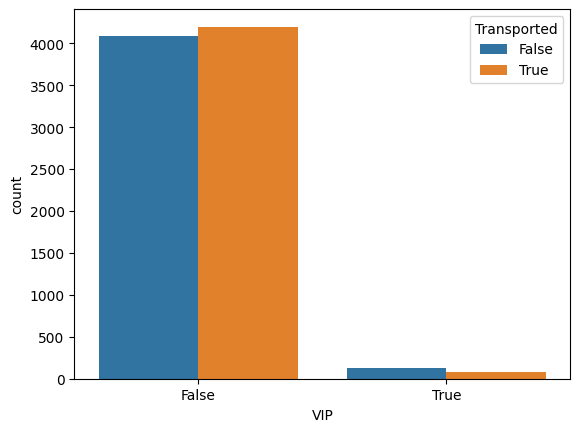

In [17]:
#During the voyage Whether the passenger has paid for special VIP service or not and the passenger Transported or not:
print(train_data['VIP'].value_counts())
sns.countplot(x='VIP',hue='Transported', data=train_data)

True     4378
False    4315
Name: Transported, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

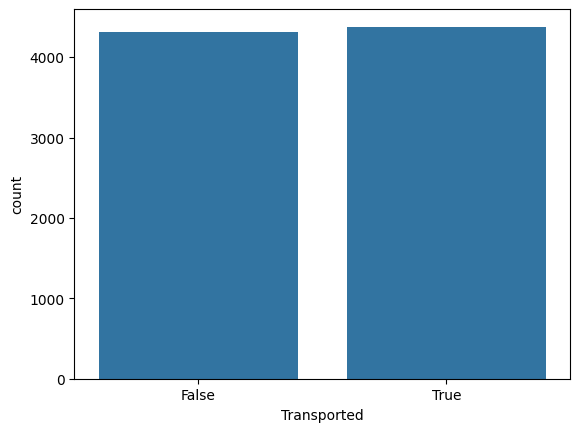

In [18]:
print(train_data['Transported'].value_counts())
sns.countplot(x='Transported', data=train_data)


False    4277
Name: Transported, dtype: int64


<Axes: xlabel='Transported', ylabel='count'>

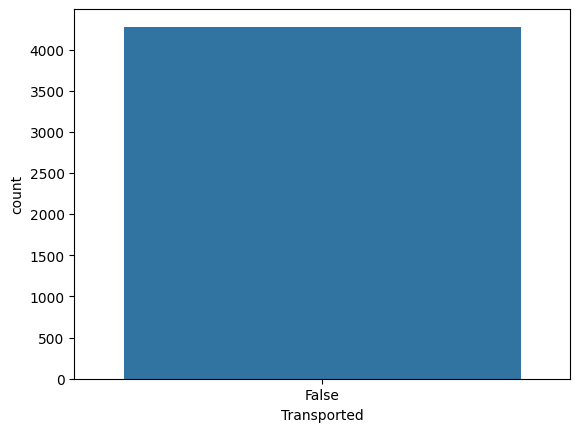

In [19]:
print(sample_submission_data['Transported'].value_counts())
sns.countplot(x='Transported', data=sample_submission_data)

In [20]:
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name] = train_data[col_name].fillna(train_data[col_name].mode()[0])
    else:
        train_data[col_name] = train_data[col_name].fillna(train_data[col_name].median())
print(train_data.shape)

(8693, 14)


In [21]:
for col_name in test_data.columns:
    if test_data[col_name].dtypes=='object':
        test_data[col_name] = test_data[col_name].fillna(test_data[col_name].mode()[0])
    else:
        test_data[col_name] = test_data[col_name].fillna(test_data[col_name].median())

Boxplot:


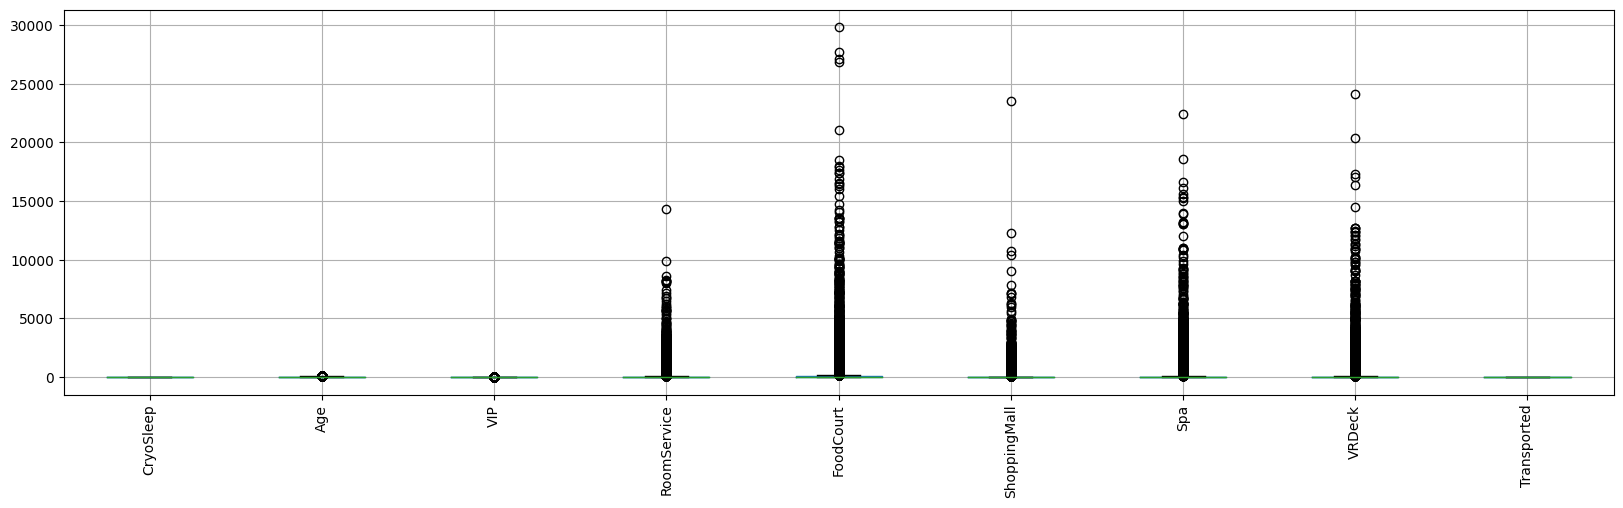

In [22]:
train_data.boxplot(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.show()

In [23]:
#  object datatype columns encoding:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col_name in train_data.columns:
    if train_data[col_name].dtypes=='object':
        train_data[col_name]=labelencoder.fit_transform(train_data[col_name])

In [24]:
object_columns = test_data.select_dtypes(include='object').columns.difference(['PassengerId'])
labelencoder = LabelEncoder()
for column in object_columns:
    test_data[column] = labelencoder.fit_transform(test_data[column])

HeatMap:

<Axes: >

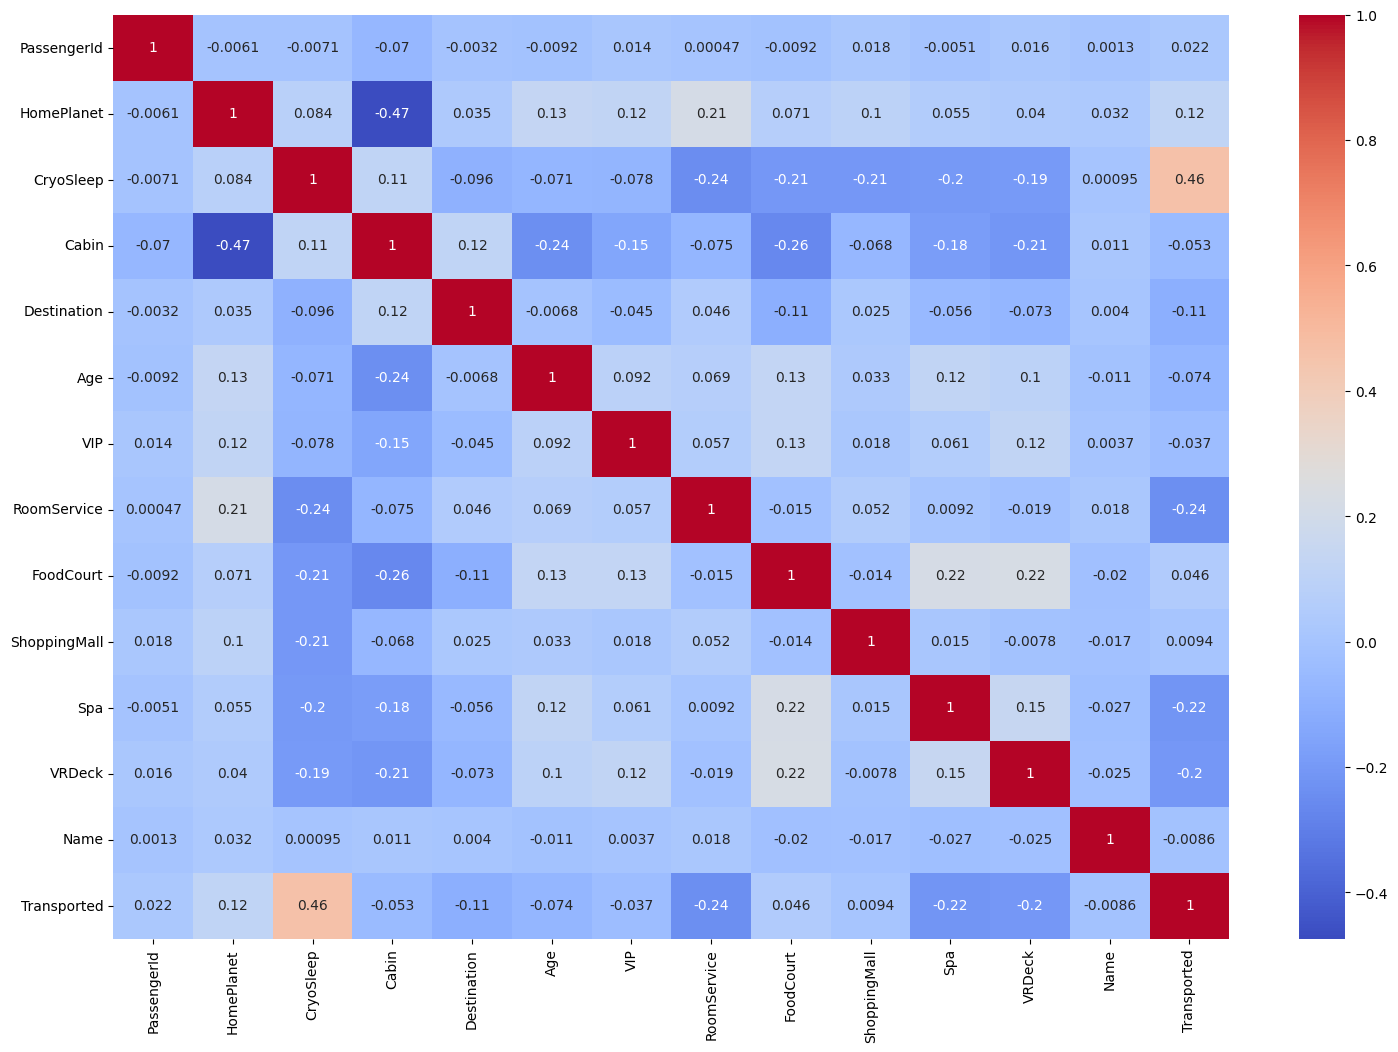

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(train_data.corr(), annot=True,cmap="coolwarm")

Data splitting and Model Building:

In [26]:
train_data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,False,149,2,39.0,False,0.0,0.0,0.0,0.0,0.0,5252,False
1,1,0,False,2184,2,24.0,False,109.0,9.0,25.0,549.0,44.0,4502,True


In [27]:
X_train = train_data.drop(['Transported','PassengerId','Name','ShoppingMall'], axis=1)
y_train = train_data['Transported']
X_test = test_data.drop(['PassengerId','Name','ShoppingMall'], axis=1)

Data Scaling

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.3, random_state=42)

XGBClassifier

In [29]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
xgb_pred=model_xgb.predict(X_test)
pd.Series(xgb_pred).value_counts()

1    2396
0    1881
dtype: int64

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': xgb_pred})
submission['Transported'] = submission['Transported'].astype(bool)
print(submission.head())
submission.to_csv('/content/drive/My Drive/submission.csv', index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [36]:
sample_submission_data['Transported'].value_counts()

False    4277
Name: Transported, dtype: int64

<Axes: ylabel='None'>

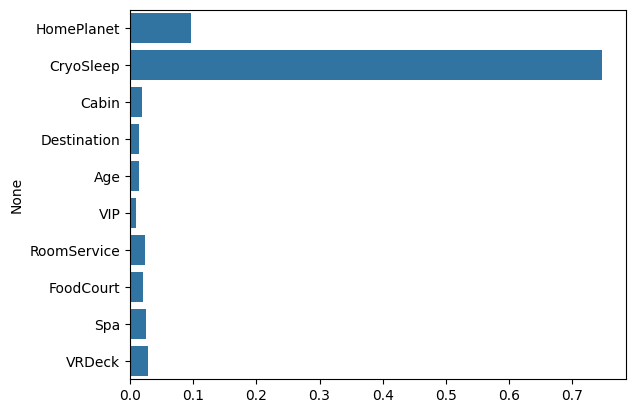

In [32]:
feature_importance = model_xgb.feature_importances_
sns.barplot(x=feature_importance, y=train_data.drop(['Transported','PassengerId','Name','ShoppingMall'], axis=1).columns)